In [133]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pdgit
import numpy as np
import requests
import datetime
from scipy.stats import linregress
import scipy
from scipy import stats
from scipy.stats import pearsonr
import hvplot.pandas
import hvplot.pandas
from citipy import citipy
from pathlib import Path

In [173]:
# File to Load
df = pd.read_csv("clean_consolidated_data.csv")
df.head()
#


,Unnamed: 0.1,Unnamed: 0,UNITID,Institution Name,State,Region,Predominant Degree,Type of School,Admission Rate,Instate Tuition and Fees,...,Bachelor of Engineering,Bachelor of English,Bachelor of Bio / Biomedical Sci,Bachelor of Math,Bachelor of Philosophy/Religion,Bachelor of Psychology,Bachelor of Social Science,Bachelor of Visual / Performing Arts,Bachelor of Business / Marketing,Bachelor of History
0,0,0,100654,Alabama A & M University,AL,Southeast,3,Public,0.5010,6828.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
1,1,1,100663,University of Alabama at Birmingham,AL,Southeast,3,Public,0.7223,6264.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2,3,100706,University of Alabama in Huntsville,AL,Southeast,3,Public,0.6368,8094.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,3,4,100724,Alabama State University,AL,Southeast,3,Public,0.5080,8082.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
4,4,5,100751,The University of Alabama,AL,Southeast,3,Public,0.4353,8600.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
# Region by Median earnings 6 years after school entry

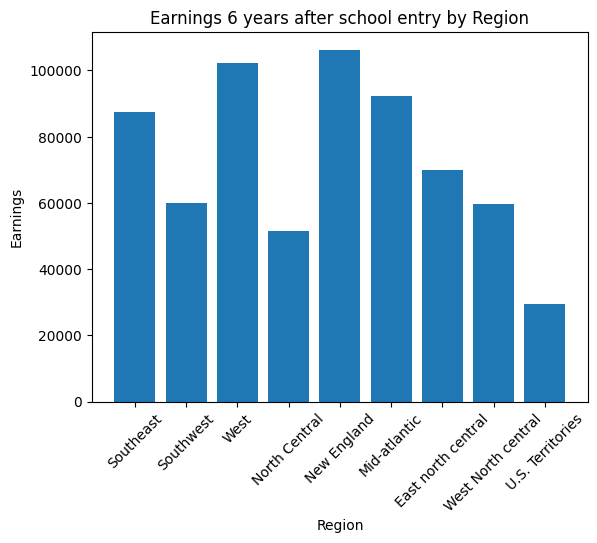

In [112]:
# Example 3: Bar chart
plt.bar(df['Region'], df['Mean earnings 6 years after school entry'])
plt.xlabel('Region')
plt.ylabel('Earnings')
plt.title('Earnings 6 years after school entry by Region')
plt.xticks(rotation=45)
plt.show()


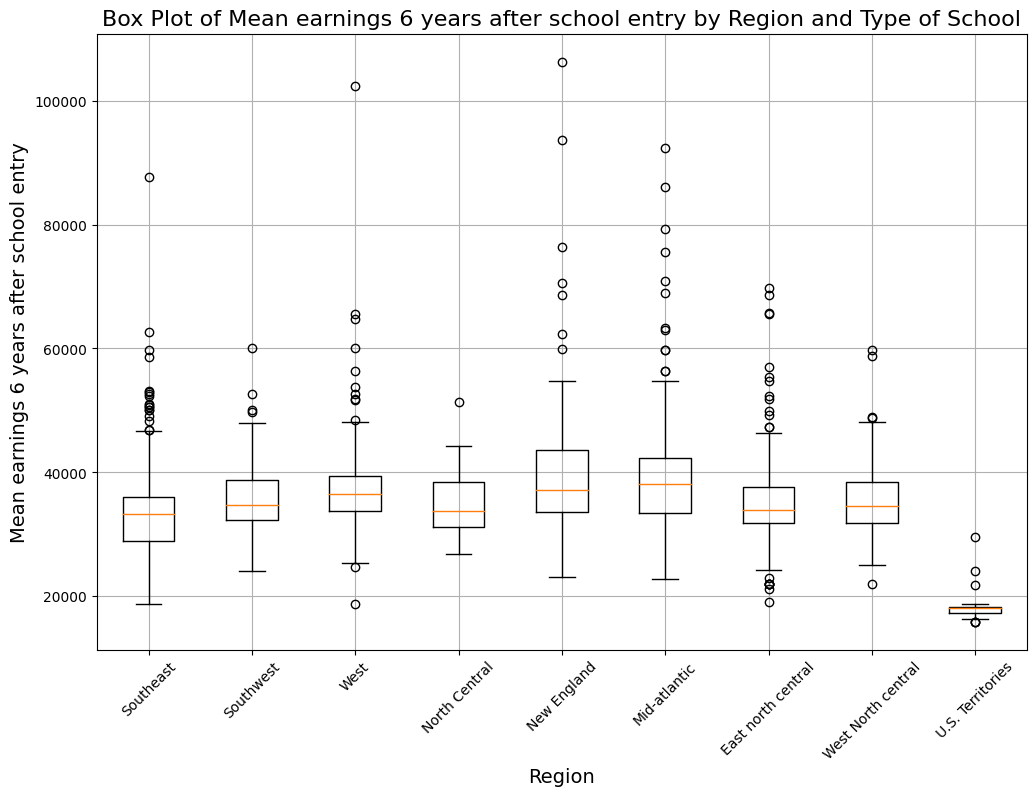

In [113]:


# Step 2: Create the box plot using matplotlib
plt.figure(figsize=(12, 8))  # Set the figure size (12 inches wide, 8 inches tall)

# Use the 'Region', 'Median', and 'Type of school' columns for the box plot
regions = df['Region'].unique() # Get the first 9 unique regions from the DataFrame
box_width = 0.2
colors = ['skyblue']
data = [df[df['Region'] == region]['Mean earnings 6 years after school entry'] for region in regions]

plt.boxplot(data, labels=regions)

plt.xlabel('Region', fontsize=14)  # Set the label for the x-axis with font size 14
plt.ylabel('Mean earnings 6 years after school entry', fontsize=14,)  # Set the label for the y-axis with font size 14
plt.title('Box Plot of Mean earnings 6 years after school entry by Region and Type of School', fontsize=16)  # Set the title for the plot with font size 16

plt.grid(True)  # Add grid lines to the plot
plt.xticks(rotation=45)

plt.show()  # Display the plot


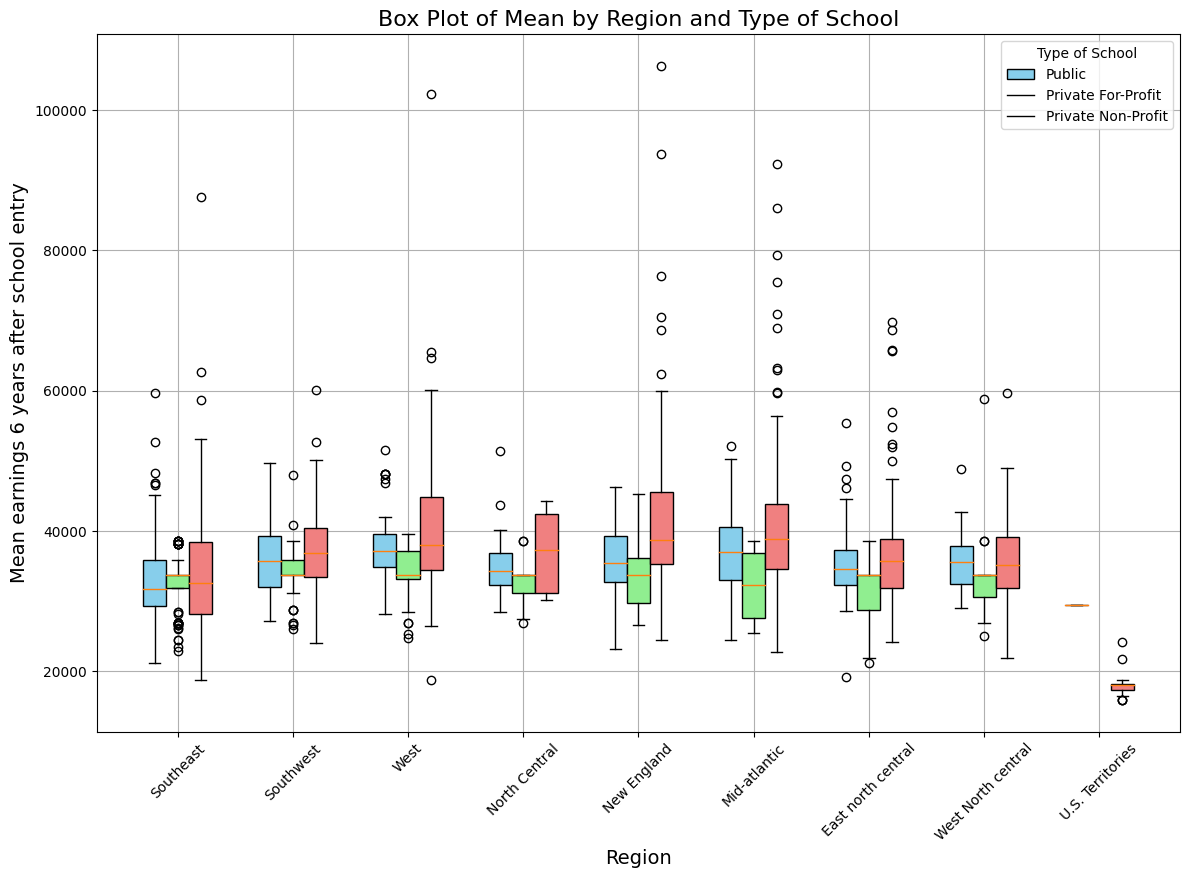

In [114]:


# Step 2: Create the box plot using matplotlib
plt.figure(figsize=(12, 8))  # Set the figure size (12 inches wide, 8 inches tall)

# Use the 'Region' and 'Mean' columns for the box plot
regions = df['Region'].unique()

# Create a list to store data for each region and each school type
data_by_region_and_type = {region: {school_type: [] for school_type in df['Type of School'].unique()} for region in regions}

# Split the data by region and school type
for region in regions:
    for school_type in df['Type of School'].unique():
        data_by_region_and_type[region][school_type].append(df[(df['Region'] == region) & (df['Type of School'] == school_type)]['Mean earnings 6 years after school entry'])

# Plot each box for each school type in each region
box_width = 0.2
box_positions = [-box_width, 0, box_width]
colors = ['skyblue', 'lightgreen', 'lightcoral']

for i, region in enumerate(regions):
    for j, school_type in enumerate(df['Type of School'].unique()):
        plt.boxplot(data_by_region_and_type[region][school_type], positions=[i + box_positions[j]], widths=box_width, patch_artist=True,
                    boxprops=dict(facecolor=colors[j]))
                 

# Set x-axis ticks and labels
plt.xticks(range(len(regions)), regions)

# Add a legend for the school types
plt.legend(df['Type of School'].unique(), title="Type of School", loc="upper right")



plt.xlabel('Region', fontsize=14)  # Set the label for the x-axis with font size 14
plt.ylabel('Mean earnings 6 years after school entry', fontsize=14)  # Set the label for the y-axis with font size 14
plt.title('Box Plot of Mean by Region and Type of School', fontsize=16)  # Set the title for the plot with font size 16

plt.grid(True)  # Add grid lines to the plot

plt.tight_layout()  # Adjust layout to prevent overlapping of labels
plt.xticks(rotation=45)

# Step 3: Show the plot
plt.show()







In [ ]:
#  State by Median earnings 6 years after school entry

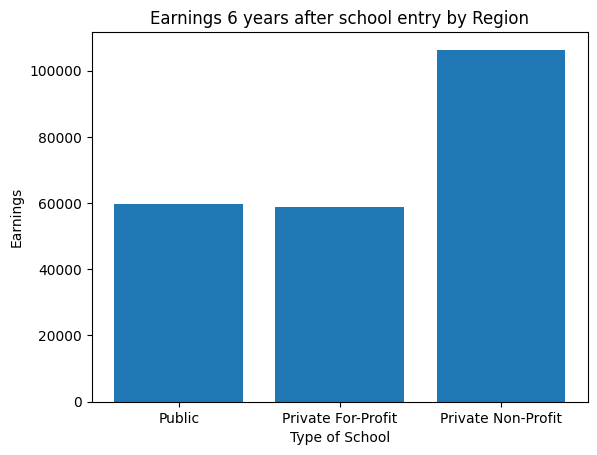

In [171]:
# Example 3: Bar chart
plt.bar(df['Type of School'], df['Mean earnings 6 years after school entry'])
plt.xlabel('Type of School')
plt.ylabel('Earnings')
plt.title('Earnings 6 years after school entry by Region')
#plt.xticks(df['Type of School'], rotation=45, ha='right')
plt.show()


In [ ]:
# Major by earnings 6 years after school entry

In [181]:


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

major_list = ['Bachelor of Agriculture',
              'Bachelor of Ethnic, Cultural or Gender Studies',
              'Bachelor of Comms - Journalism',
              'Bachelor of Comp Sci / IT',
              'Bachelor of Education',
              'Bachelor of Engineering',
              'Bachelor of English',
              'Bachelor of Bio / Biomedical Sci',
              'Bachelor of Math',
              'Bachelor of Philosophy/Religion',
              'Bachelor of Psychology',
              'Bachelor of Social Science',
              'Bachelor of Visual / Performing Arts',
              'Bachelor of Business / Marketing',
              'Bachelor of History']

major_data = []

for x in major_list:
    mean_value = df.loc[df[x] == 1, 'Mean earnings 6 years after school entry'].mean()
    med_value = df.loc[df[x] == 1, 'Mean earnings 6 years after school entry'].median()
    major_data.append({'Major': x, "Mean": mean_value, "Median": med_value})

major_df = pd.DataFrame(major_data)

major_df_sorted = major_df.sort_values(by='Mean', ascending=False)

print(major_df_sorted)

                                             Major          Mean   Median
5                          Bachelor of Engineering  39933.991228  38100.0
1   Bachelor of Ethnic, Cultural or Gender Studies  39782.692308  37100.0
9                  Bachelor of Philosophy/Religion  37953.630573  36400.0
10                          Bachelor of Psychology  37107.771536  35800.0
8                                 Bachelor of Math  37090.030519  35700.0
14                             Bachelor of History  37086.164802  35700.0
11                      Bachelor of Social Science  36991.007905  35700.0
6                              Bachelor of English  36907.368421  35700.0
7                 Bachelor of Bio / Biomedical Sci  36825.695110  35700.0
2                   Bachelor of Comms - Journalism  36587.812500  35500.0
4                            Bachelor of Education  36364.650284  35400.0
3                        Bachelor of Comp Sci / IT  36349.834711  34900.0
13                Bachelor of Business

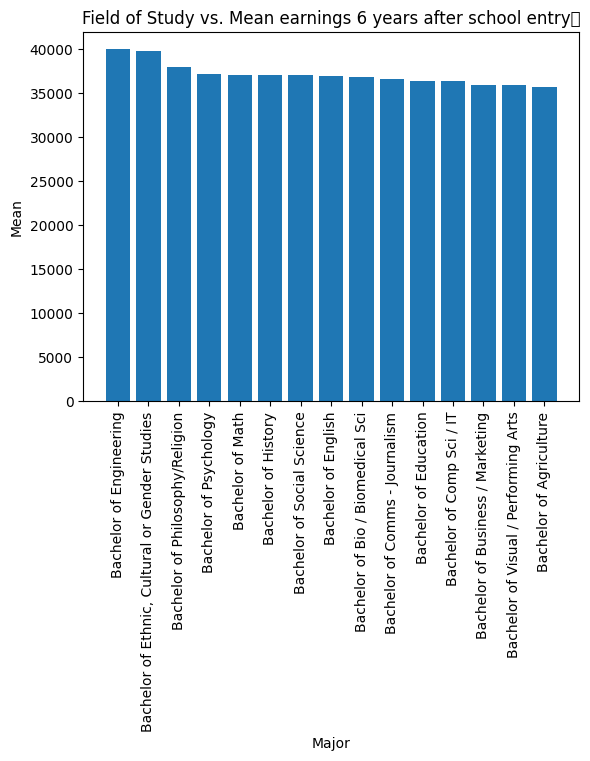

In [184]:
major_df = major_df.sort_values(by="Mean", ascending=False)



barplot = plt.bar(major_df['Major'], major_df["Mean"])
plt.xlabel("Major")
plt.ylabel("Mean")
plt.title("Field of Study vs. Mean earnings 6 years after school entry	")

plt.xticks(rotation=90)

plt.show()

In [ ]:
#Tuition vs Earnings

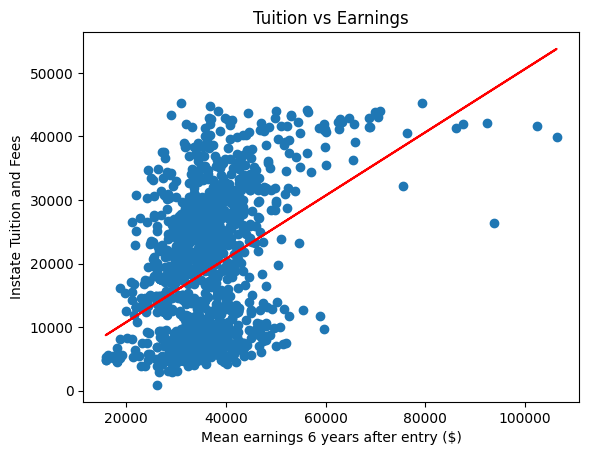

In [139]:
#scatter of repayment rate vs. earnings
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(df['Mean earnings 6 years after school entry'], df['Instate Tuition and Fees'])

# Get regression values
regress_values = df['Mean earnings 6 years after school entry'] * slope + intercept

#plot data


plt.scatter(df['Mean earnings 6 years after school entry'], df['Instate Tuition and Fees'], marker='o')
plt.xlabel("Mean earnings 6 years after entry ($)")
plt.ylabel("Instate Tuition and Fees")
plt.title("Tuition vs Earnings")
plt.plot(df['Mean earnings 6 years after school entry'], regress_values, "r-")

plt.show()

In [140]:
# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(df['Mean earnings 6 years after school entry'], df['Instate Tuition and Fees'])

# Calculate the slope (m) of the regression line
m = correlation_coefficient * (df['Instate Tuition and Fees'].std() / df['Mean earnings 6 years after school entry'].std())
print(m)
# Calculate the y-intercept (b) of the regression line
b = df['Instate Tuition and Fees'].mean() - m * df['Mean earnings 6 years after school entry'].mean()

# Write the linear equation y = mx + b
equation = f"y = {m:.2f}x + {b:.2f}"
print("Linear Equation:", equation)




0.4980778917478056
Linear Equation: y = 0.50x + 811.35
